In [1]:
import cv2
import numpy as np
from scipy import misc

In [2]:
i = misc.ascent()

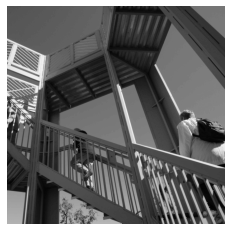

In [4]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

### Create the transformed image by copying array

In [5]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

### Create a filter as a 3x3 array

In [7]:
# This filter will detect edges, creating a convolution that only passes through sharp edges and straight lines

# Gaussian filter
gauss_filter = [
[0,1,0],
[1,-4,1],
[0,1,0]
]
filter1 = [
[-1,-2,-1],
[0,0,0],
[1,2,1]
]
filter2 = [
[-1,0,1],
[-2,0,2],
[-1,0,1]
]

# If all the digits in the filter do not add up to 0 or 1, you should probably create some weight parameter to get it to do so, for example if your weights are 1,1,1,1,1,2,1,1 then add up to len(weights), so you would get a set of weights of 0.1 if you want to normalize them
weight = 1

## Colvolving


In [15]:
def convolve(filter=gauss_filter):
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            convolution = 0.0
            convolution += (i[x-1, y-1] *filter[0][0])
            convolution += (i[x, y-1] *filter[0][1])
            convolution += (i[x+1, y-1] *filter[0][2])
            convolution += (i[x-1, y] *filter[1][0])
            convolution += (i[x, y] *filter[1][1])
            convolution += (i[x+1, y] *filter[1][2])
            convolution += (i[x-1, y+1] *filter[2][0])
            convolution += (i[x, y+1] *filter[2][1])
            convolution += (i[x+1, y+1] *filter[2][2])
            convolution *= weight
            if convolution<0:
                convolution = 0
            elif convolution>255:
                convolution = 255
            i_transformed[x,y] = convolution
    # Plot the image, not the size of the axes (512,512)
    plt.gray()
    plt.grid(False)
    plt.imshow(i_transformed)
    # plt.axis('off')
    plt.show()

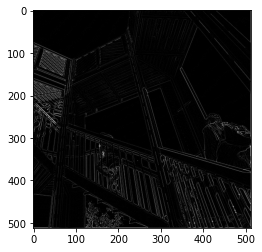

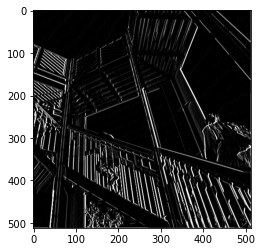

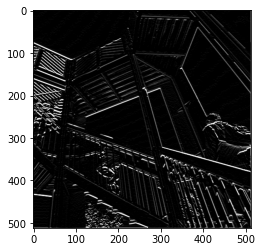

In [17]:
convolve()
convolve(filter1)
convolve(filter2)

# Max Pooling
Iterate over the image and look at the pixel and it's intermediate neighbours to the right, beneath and right-beneath. 
Take the largest of them and load them into the new image. Thus the new image will be 0.25 the size of the old, with the x,y dimensions being halfed by this process. 

Features are maintained despite this compression!


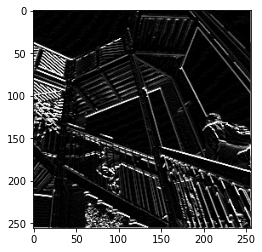

In [20]:
new_x = int(size_x/2)
new_y = int(size_y/2)

newImage = np.zeros((new_x,new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x,y])
        pixels.append(i_transformed[x+1,y])
        pixels.append(i_transformed[x,y+1])
        pixels.append(i_transformed[x+1,y+1])
        pixels.sort(reverse=True)
        newImage[int(x/2),int(y/2)] = pixels[0]
        
# note (256,256) instead of (512,512)
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()
        

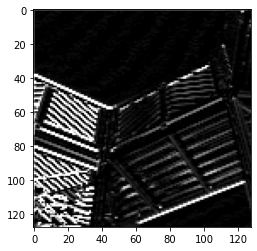

In [21]:
# this doesnt work :P

new_x_2 = int(new_x/2)
new_y_2 = int(new_y/2)

newImage = np.zeros((new_x_2,new_y_2))
for x in range(0, new_x, 2):
    for y in range(0, new_y, 2):
        pixels = []
        pixels.append(i_transformed[x,y])
        pixels.append(i_transformed[x+1,y])
        pixels.append(i_transformed[x,y+1])
        pixels.append(i_transformed[x+1,y+1])
        pixels.sort(reverse=True)
        newImage[int(x/2),int(y/2)] = pixels[0]
        
# note (128,128 ) instead of (256,256)
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()